In [8]:
import yfinance as yf
import pandas as pd

tickers = ['MSFT', 'IBM', 'AAPL', 'GOOG']

def get_data(tickers):
    stock_data = {}
    for ticker in tickers:
        df = yf.download(ticker, start="2009-01-01", end="2020-05-08")
        stock_data[ticker] = df
    return stock_data

stock_data = get_data(tickers)

for ticker, df in stock_data.items():
    df.to_csv(f'{ticker}.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
# TODO so we use A2C to trade for the next quarter 
# I dont think this is using quarterly to do ensemble data 



# # TODO Paper says that A2C agent is moreadaptive to risk. TODO test thi. A2C is good at handling a bearish market.

# PPO agent
# is good at following trend and acts well in generating
# more returns, it has the highest annual return

In [10]:
import pandas as pd

# # Danh sách các cổ phiếu trong Dow Jones 30
# tickers = [
#     'MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW',
#     'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
#     'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WBA', 'WMT', 'XOM'
# ]

tickers = ['MSFT', 'IBM', 'AAPL', 'GOOG']

# ticker of benchmark
benchmark = '^DJI'

# Get the data from the CSV files
stock_data = {}
for ticker in tickers:
    df = pd.read_csv(f'{ticker}.csv', index_col='Date', parse_dates=True)
    stock_data[ticker] = df

# TODO We are only using the training data here

# split the data into training, validation and test sets
training_data_time_range = ('2009-01-01', '2015-12-31')

#validation_data_time_range = ('2016-01-01', '2016-12-31')
test_data_time_range = ('2017-01-01', '2020-05-08')

# split the data into training, validation and test sets
training_data = {}

#validation_data = {}
test_data = {}

for ticker, df in stock_data.items():
    training_data[ticker] = df.loc[training_data_time_range[0]:training_data_time_range[1]]

    #validation_data[ticker] = df.loc[validation_data_time_range[0]:validation_data_time_range[1]]
    test_data[ticker] = df.loc[test_data_time_range[0]:test_data_time_range[1]]

# print shape of training, validation and test data
ticker = 'AAPL'
print(f'Training data shape for {ticker}: {training_data[ticker].shape}')

#print(f'Validation data shape for {ticker}: {validation_data[ticker].shape}')

print(f'Test data shape for {ticker}: {test_data[ticker].shape}')

# Display the first 5 rows of the data
stock_data['AAPL'].head()

Training data shape for AAPL: (1762, 6)
Test data shape for AAPL: (842, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.737005,746015200
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.852516,1181608400
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.805468,1289310400
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.744846,753048800
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.795817,673500800


In [11]:
import pandas as pd
import numpy as np


# Then add the portfolio avg returns compared to the betas



# The book-to-market ratio for a portfolio is a financial metric 
# used to compare the book value of a portfolio’s assets to its market value. 
# Here’s a breakdown of the key concepts:

# Book Value: This is the value of the assets as recorded on the company’s balance sheet. It represents the net asset value (total assets minus total liabilities).

# Market Value: This is the current market price of the assets. 
# For a portfolio, it would be the total market value of all the securities
#held within it.

# Book-to-Market Ratio: This ratio is calculated by dividing the book 
# value by the market value. For a portfolio, it can be expressed as:
# Book-to-Market Ratio=Total Market Value of PortfolioTotal Book Value of Portfolio​

def add_technical_indicators(df):

    
    # calculate RSI 14 

    # The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements. 
    # It ranges from 0 to 100 and is typically used to identify overbought or oversold conditions in a stock.

    # To calculate the 14-day RSI (RSI 14), follow these steps:
    
    # Calculate the daily price changes: Subtract the previous day’s closing price from the current day’s closing price.
    # Separate the gains and losses: If the price change is positive, it’s a gain; if negative, it’s a loss.
    # Calculate the average gain and average loss over the past 14 days:
    # Average Gain = (Sum of Gains over the past 14 days) / 14
    # Average Loss = (Sum of Losses over the past 14 days) / 14
    # Calculate the Relative Strength (RS):
    # RS = Average Gain / Average Loss
    # Calculate the RSI using the formula:
    # RSI = 100 - (100 / (1 + RS))
    
    delta = df['Close'].diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    rs = up.rolling(window=14).mean() / down.rolling(window=14).mean()
    df['RSI'] = 100 - (100 / (1 + rs))


    # # Calculate the differences in returns
    # delta = df['Return'].diff()
    
    # # Separate the positive and negative differences
    # up = delta.where(delta > 0, 0)
    # down = -delta.where(delta < 0, 0)
    
    # # Calculate the rolling mean of the positive and negative differences
    # roll_up = up.rolling(window=14).mean()
    # roll_down = down.rolling(window=14).mean()
    
    # # Calculate the Relative Strength (RS)
    # rs = roll_up / roll_down
    
    # # Calculate the RSI
    # df['RSI'] = 100 - (100 / (1 + rs))


    # Function to calculate the Exponential Moving Average (EMA)
    # def calculate_ema(data, span):
    #     # Use the ewm (exponential weighted moving) method to calculate EMA
    #     return data.ewm(span=span, adjust=False).mean()
    
    # # Function to calculate MACD and Signal Line
    # def calculate_macd(data):
    #     # Calculate the 12-period EMA
    #     ema_12 = calculate_ema(data['Close'], 12)
    #     # Calculate the 26-period EMA
    #     ema_26 = calculate_ema(data['Close'], 26)
    #     # MACD is the difference between the 12-period EMA and the 26-period EMA
    #     macd = ema_12 - ema_26
    #     # Signal Line is the 9-period EMA of the MACD
    #     signal = calculate_ema(macd, 9)
    #     return macd, signal
    
    # # Example usage with a DataFrame 'df' containing stock data
    # # Calculate the 12-period EMA and add it to the DataFrame
    # df['EMA_12'] = calculate_ema(df['Close'], 12)
    # # Calculate the 26-period EMA and add it to the DataFrame
    # df['EMA_26'] = calculate_ema(df['Close'], 26)
    # # Calculate the MACD and Signal Line and add them to the DataFrame
    # df['MACD'], df['Signal_Line'] = calculate_macd(df)


    # What is EMA?
    # An Exponential Moving Average (EMA) is a type of moving average that places a 
    # greater weight and significance on the most recent data points. 
    # This makes it more responsive to new information compared to a 
    # Simple Moving Average (SMA), which assigns equal weight to all observations 
    # in the period.

    # Key Points about EMA:
    # Weighting: EMA gives more importance to recent prices, 
    # making it more sensitive to recent price changes.
    # Calculation: The formula for EMA involves a smoothing factor, 
    # which is typically calculated as ( \frac{2}{N+1} ), 
    # where ( N ) is the number of periods.
    # Usage: EMAs are commonly used in technical analysis to identify 
    # trends and potential buy or sell signals. 
    # They are often used in conjunction with other indicators like 
    # the MACD (Moving Average Convergence Divergence).
    
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()

    
    # The Moving Average Convergence Divergence (MACD) is a popular technical analysis indicator used 
    # to identify changes in the strength, direction, momentum, and duration of a trend in a stock’s price.
    # Key Components of MACD:

    # MACD Line: This is calculated by subtracting the 26-period Exponential Moving Average (EMA) from 
    # the 12-period EMA:MACD=EMA12​−EMA26​
    
    # Signal Line: This is a 9-period EMA of the MACD line. It is used to generate buy and sell signals.
    # Histogram: This represents the difference between the MACD line and the Signal line. 
    # It helps visualize the momentum of the trend.
    
    # How to Interpret MACD:
    
    # Crossovers: When the MACD line crosses above the Signal line, it is considered a bullish signal 
    # (indicating it might be a good time to buy). Conversely, when the MACD line crosses below the Signal line, 
    # it is considered a bearish signal (indicating it might be a good time to sell).
    
    # Divergence: When the price of a stock diverges from the MACD, it can indicate the end of the current trend. 
    # For example, if the price is rising but the MACD is falling, it may suggest that the upward momentum is weakening.
    # Overbought/Oversold Conditions: When the MACD rises significantly above the Signal line, the stock may be overbought. 
    #     When it falls significantly below the Signal line, the stock may be oversold.
    
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    # To calculate the 14-period Relative Strength Index (RSI 14), follow these steps:

    # Calculate the daily price changes: Subtract the previous day’s closing price from 
    # the current day’s closing price.
    # Separate the gains and losses: If the price change is positive, 
    # it’s a gain; if negative, it’s a loss.
    # Calculate the average gain and average loss over the past 14 days:
    # Average Gain = (Sum of Gains over the past 14 days) / 14
    # Average Loss = (Sum of Losses over the past 14 days) / 14
    # Calculate the Relative Strength (RS):
    # RS = Average Gain / Average Loss
    # Calculate the RSI using the formula:
    # RSI = 100 - (100 / (1 + RS))

    # How to Use RSI 14:
    # Trend Reversals: RSI can signal potential trend reversals when it 
    # moves out of the overbought or oversold zones.
    # Divergence: When the price of a stock moves in the opposite direction of the RSI, 
    # it can indicate a potential reversal.
    # Centerline Crossovers: An RSI crossing above 50 can indicate a bullish trend, 
    # while crossing below 50 can indicate a bearish trend.

    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # The Commodity Channel Index (CCI) is a momentum-based oscillator used to identify 
    # cyclical trends in a stock’s price. 
    # It measures the current price level relative to an average price level over a given period, 
    # typically 20 periods.

    # A momentum-based oscillator is a type of technical analysis tool used to measure the speed and 
    # magnitude of price movements in a financial instrument. T
    # hese oscillators help traders identify overbought or oversold conditions,
    # potential trend reversals, and the strength of a trend.
    
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_dev = tp.rolling(window=20).apply(lambda x: np.mean(np.abs(x - x.mean())))
    df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)
    
    # The Average Directional Index (ADX) is a technical analysis indicator used to quantify the strength of a trend. 
    # It is part of the Directional Movement System developed by J. Welles Wilder and includes three lines: the ADX line, 
    # the Positive Directional Indicator (+DI), and the Negative Directional Indicator (-DI).
    high_diff = df['High'].diff()
    low_diff = df['Low'].diff()
    df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    df['-DM'] = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    tr = pd.concat([df['High'] - df['Low'], np.abs(df['High'] - df['Close'].shift(1)), np.abs(df['Low'] - df['Close'].shift(1))], axis=1).max(axis=1)
    atr = tr.ewm(span=14, adjust=False).mean()
    df['+DI'] = 100 * (df['+DM'].ewm(span=14, adjust=False).mean() / atr)
    df['-DI'] = 100 * (df['-DM'].ewm(span=14, adjust=False).mean() / atr)
    dx = 100 * np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df['ADX'] = dx.ewm(span=14, adjust=False).mean()

    # drop NaN values
    df.dropna(inplace=True)

    # keep Open, High, Low, Close, Volume, MACD, Signal, RSI, CCI, ADX
    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX']]

    return df

In [12]:
from stable_baselines3 import PPO, A2C, DDPG, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv

# I have removed the use of agent to speed this up

# Define Ensemble Agent
class EnsembleAgent:
    def __init__(self, ppo_model, a2c_model, ddpg_model, sac_model, td3_model):
        self.ppo_model = ppo_model
        self.a2c_model = a2c_model
        self.ddpg_model = ddpg_model
        self.sac_model = sac_model
        self.td3_model = td3_model
    
    def predict(self, obs):
        ppo_action, _ = self.ppo_model.predict(obs)
        a2c_action, _ = self.a2c_model.predict(obs)
        ddpg_action, _ = self.ddpg_model.predict(obs)
        sac_action, _ = self.sac_model.predict(obs)
        td3_action, _ = self.td3_model.predict(obs)
        
        # TODO fix this
        # Average the actions
        ensemble_action = np.mean([ppo_action, a2c_action, ddpg_action, sac_action, td3_action], axis=0)
        #ensemble_action = np.mean([ppo_action, a2c_action, ddpg_action], axis=0)
        return ensemble_action
    
# Define PPO Agent
class PPOAgent:
    def __init__(self, env, total_timesteps):
        self.model = PPO("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action
    
# Define A2C Agent
class A2CAgent:
    def __init__(self, env, total_timesteps):
        self.model = A2C("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action
    
# Define DDPG Agent
class DDPGAgent:
    def __init__(self, env, total_timesteps):
        self.model = DDPG("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action


# TODO ignore these for now, not used in the paper   
# Define SAC Agent
class SACAgent:
    def __init__(self, env, total_timesteps):
        self.model = SAC("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action
    
# Define TD3 Agent
class TD3Agent:
    def __init__(self, env, total_timesteps):
        self.model = TD3("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action

In [13]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd

# To model the stochastic nature of the dynamic stock
#  market, we employ a Markov Decision Process (MDP) as
#  follows:
#  State s = [phb]: a vector that includes stock prices
#  p RD
#  +, the stock shares h ZD
#  +, and the remaining
#  balance b 
# R+, where D denotes the number of
#  stocks and Z+ denotes non-negative integers.

#  Action a: a vector of actions over D stocks. The
#  allowed actions on each stock include selling, buying,
#  or holding, which result in decreasing, increasing, and
#  no change of the stock shares h, respectively.

#  Reward r(sas): the direct reward of taking action
#  a at state s and arriving at the new state s.

#  Policy (s): the trading strategy at state s, which is
#  the probability distribution of actions at state s.

#  Q-value Q(sa): the expected reward of taking action
#  a at state s following policy .

class StockTradingEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stock_data, transaction_cost_percent=0.005):
        super(StockTradingEnv, self).__init__()
        
        # Remove any empty DataFrames
        self.stock_data = {ticker: df for ticker, df in stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())
        
        if not self.tickers:
            raise ValueError("All provided stock data is empty")
        
        # Calculate the size of one stock's data
        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)
        
        # Define action and observation space
        self.action_space = spaces.Box(low=-1, high=1, shape=(len(self.tickers),), dtype=np.float32)
        
        # Observation space: price data for each stock + balance + shares held + net worth + max net worth + current step
        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)
        
        # Initialize account balance
        # TODO Need to either adjust this to match the online algorithms or adjust the online algorithms,
        # the must operate with the same starting balance over the same timeframe
        self.initial_balance = 1000
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        
        # Set the current step
        self.current_step = 0
        
        # Calculate the minimum length of data across all stocks
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

        # Transaction cost
        self.transaction_cost_percent = transaction_cost_percent
    
    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        self.current_step = 0
        return self._next_observation(), {}
    
    def _next_observation(self):
        # initialize the frame
        frame = np.zeros(self.obs_shape)
        
        # Add stock data for each ticker
        idx = 0
        # Loop through each ticker
        for ticker in self.tickers:
            # Get the DataFrame for the current ticker
            df = self.stock_data[ticker]
            # If the current step is less than the length of the DataFrame, add the price data for the current step
            if self.current_step < len(df):
                frame[idx:idx+self.n_features] = df.iloc[self.current_step].values
            # Otherwise, add the last price data available
            elif len(df) > 0:
                frame[idx:idx+self.n_features] = df.iloc[-1].values
            # Move the index to the next ticker
            idx += self.n_features

        # Add balance, shares held, net worth, max net worth, and current step
        frame[-4-len(self.tickers)] = self.balance # Balance
        frame[-3-len(self.tickers):-3] = [self.shares_held[ticker] for ticker in self.tickers] # Shares held
        frame[-3] = self.net_worth # Net worth
        frame[-2] = self.max_net_worth # Max net worth
        frame[-1] = self.current_step # Current step
        
        return frame
    
    def step(self, actions):
        # update the current step
        self.current_step += 1
        
        # check if we have reached the maximum number of steps
        if self.current_step > self.max_steps:
            return self._next_observation(), 0, True, False, {}
        
        current_prices = {}
        # Loop through each ticker and perform the action
        for i, ticker in enumerate(self.tickers):
            # Get the current price of the stock
            current_prices[ticker] = self.stock_data[ticker].iloc[self.current_step]['Close']
            # get the action for the current ticker
            action = actions[i]
            
            if action > 0:  # Buy
                # Calculate the number of shares to buy
                shares_to_buy = int(self.balance * action / current_prices[ticker])
                # Calculate the cost of the shares
                cost = shares_to_buy * current_prices[ticker]
                # Transaction cost
                transaction_cost = cost * self.transaction_cost_percent
                # Update the balance and shares held
                self.balance -= (cost + transaction_cost)
                # Update the total shares sold
                self.shares_held[ticker] += shares_to_buy

            elif action < 0:  # Sell
                # Calculate the number of shares to sell
                shares_to_sell = int(self.shares_held[ticker] * abs(action))
                # Calculate the sale value
                sale = shares_to_sell * current_prices[ticker]
                # Transaction cost
                transaction_cost = sale * self.transaction_cost_percent
                # Update the balance and shares held
                self.balance += (sale - transaction_cost)
                # Update the total shares sold
                self.shares_held[ticker] -= shares_to_sell
                # Update the shares sold
                self.total_shares_sold[ticker] += shares_to_sell
                # Update the total sales value
                self.total_sales_value[ticker] += sale
        
        # Calculate the net worth
        self.net_worth = self.balance + sum(self.shares_held[ticker] * current_prices[ticker] for ticker in self.tickers)
        # Update the max net worth
        self.max_net_worth = max(self.net_worth, self.max_net_worth)
        # Calculate the reward
        reward = self.net_worth - self.initial_balance
        # Check if the episode is done
        done = self.net_worth <= 0 or self.current_step >= self.max_steps
        
        obs = self._next_observation()
        return obs, reward, done, False, {}
    
    def render(self, mode='human'):
        # Print the current step, balance, shares held, net worth, and profit
        profit = self.net_worth - self.initial_balance
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance:.2f}')
        for ticker in self.tickers:
            print(f'{ticker} Shares held: {self.shares_held[ticker]}')
        print(f'Net worth: {self.net_worth:.2f}')
        print(f'Profit: {profit:.2f}')

    def close(self):
        pass

# def update_stock_data(self, new_stock_data, transaction_cost_percent=None):
#     """
#     Update the environment with new stock data.

#     Parameters:
#     new_stock_data (dict): Dictionary containing new stock data,
#                            with keys as stock tickers and values as DataFrames.
#     """
#     # Remove empty DataFrames
#     self.stock_data = {ticker: df for ticker, df in new_stock_data.items() if not df.empty}
#     self.tickers = list(self.stock_data.keys())

#     if not self.tickers:
#         raise ValueError("All new stock data are empty")

#     # Update the number of features if needed
#     sample_df = next(iter(self.stock_data.values()))
#     self.n_features = len(sample_df.columns)

#     # Update observation space
#     self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
#     self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

#     # Update maximum steps
#     self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

#     # Update transaction cost if provided
#     if transaction_cost_percent is not None:
#         self.transaction_cost_percent = transaction_cost_percent

#     # Reset the environment
#     self.reset()

#     print(f"The environment has been updated with {len(self.tickers)} new stocks.")

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to create the environment and train the agents
def create_env_and_train_agents(data, total_timesteps):
    # Create the environment using DummyVecEnv with training data
    env = DummyVecEnv([lambda: StockTradingEnv(data)])

    # Train PPO Agent
    ppo_agent = PPOAgent(env, total_timesteps)

    # Train A2C Agent
    a2c_agent = A2CAgent(env, total_timesteps)

    # Train DDPG Agent
    ddpg_agent = DDPGAgent(env, total_timesteps)

    # Train SAC Agent
    sac_agent = SACAgent(env, total_timesteps)

    # Train TD3 Agent
    td3_agent = TD3Agent(env, total_timesteps)

    # Train the ensemble agent
    ensemble_agent = EnsembleAgent(ppo_agent.model, a2c_agent.model, ddpg_agent.model, sac_agent.model, td3_agent.model)
    # ensemble_agent = EnsembleAgent(ppo_agent, a2c_agent, ddpg_agent, None, None)
    
    #return env, ppo_agent, a2c_agent, ddpg_agent, sac_agent, td3_agent, ensemble_agent
    return env, ppo_agent, a2c_agent, ddpg_agent, sac_agent, td3_agent, ensemble_agent

In [15]:
import matplotlib.pyplot as plt

# Function to visualize portfolio changes
def visualize_portfolio(steps, balances, net_worths, shares_held, tickers, show_balance=True, show_net_worth=True, show_shares_held=True):
    fig, axs = plt.subplots(3, figsize=(12, 18))

    # Plot the balance
    if show_balance:
        axs[0].plot(steps, balances, label='Balance')
        axs[0].set_title('Balance Over Time')
        axs[0].set_xlabel('Steps')
        axs[0].set_ylabel('Balance')
        axs[0].legend()

    # Plot the net worth
    if show_net_worth:
        axs[1].plot(steps, net_worths, label='Net Worth', color='orange')
        axs[1].set_title('Net Worth Over Time')
        axs[1].set_xlabel('Steps')
        axs[1].set_ylabel('Net Worth')
        axs[1].legend()

    # Plot the shares held
    if show_shares_held:
        for ticker in tickers:
            axs[2].plot(steps, shares_held[ticker], label=f'Shares Held: {ticker}')
        axs[2].set_title('Shares Held Over Time')
        axs[2].set_xlabel('Steps')
        axs[2].set_ylabel('Shares Held')
        axs[2].legend()

    plt.tight_layout()
    plt.show()

# function to visualize the portfolio net worth
def visualize_portfolio_net_worth(steps, net_worths):
    plt.figure(figsize=(12, 6))
    plt.plot(steps, net_worths, label='Net Worth', color='orange')
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

# function to visualize the multiple portfolio net worths ( same chart )
def visualize_multiple_portfolio_net_worth(steps, net_worths_list, labels):
    plt.figure(figsize=(12, 6))
    for i, net_worths in enumerate(net_worths_list):
        plt.plot(steps, net_worths, label=labels[i])
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

In [16]:
def test_agent(env, agent, stock_data, n_tests=1000, visualize=False):
    """
    Test a single agent and track performance metrics, with an option to visualize the results.

    Parameters:
    - env: The trading environment.
    - agent: The agent to be tested.
    - stock_data: Data for the stocks in the environment.
    - n_tests: Number of tests to run (default: 1000).
    - visualize: Boolean flag to enable or disable visualization (default: False).

    Returns:
    - A dictionary containing steps, balances, net worths, and shares held.
    """
    # Initialize metrics tracking
    metrics = {
        'steps': [],
        'balances': [],
        'net_worths': [],
        'shares_held': {ticker: [] for ticker in stock_data.keys()}
    }

    # Reset the environment before starting the tests
    obs = env.reset()

    for i in range(n_tests):
        metrics['steps'].append(i)
        action = agent.predict(obs)
        obs, rewards, dones, infos = env.step(action)

        if visualize:
            env.render()

        # Track metrics
        metrics['balances'].append(env.get_attr('balance')[0])
        metrics['net_worths'].append(env.get_attr('net_worth')[0])
        env_shares_held = env.get_attr('shares_held')[0]

        # Update shares held for each ticker
        for ticker in stock_data.keys():
            if ticker in env_shares_held:
                metrics['shares_held'][ticker].append(env_shares_held[ticker])
            else:
                metrics['shares_held'][ticker].append(0)  # Append 0 if ticker is not found

        if dones:
            obs = env.reset()
            
    return metrics

In [17]:
def test_and_metric_agents(env, agents, training_data, n_tests=1000):
    metrics = {}
    for agent_name, agent in agents.items():
        print(f"Testing {agent_name}...")
        metrics[agent_name] = test_agent(env, agent, training_data, n_tests=n_tests, visualize=True)
        print(f"Done testing {agent_name}!")
    
    print('-'*50)
    print('All agents tested!')
    print('-'*50)

    return metrics

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compare_and_plot_agents(agents_metrics, labels, risk_free_rate=0.0):
    # Function to compare returns, standard deviation, and sharpe ratio of agents
    def compare_agents(agents_metrics, labels):
        returns = []
        stds = []
        sharpe_ratios = []

        for metrics in agents_metrics:
            net_worths = metrics['net_worths']
            # Calculate daily returns
            daily_returns = np.diff(net_worths) / net_worths[:-1]
            avg_return = np.mean(daily_returns)
            std_return = np.std(daily_returns)
            sharpe_ratio = (avg_return - risk_free_rate) / std_return

            returns.append(avg_return)
            stds.append(std_return)
            sharpe_ratios.append(sharpe_ratio)

        df = pd.DataFrame({
            'Agent': labels,
            'Return': returns,
            'Standard Deviation': stds,
            'Sharpe Ratio': sharpe_ratios
        })

        return df

    # Compare agents
    df = compare_agents(agents_metrics, labels)
    # Sort the dataframe by sharpe ratio
    df_sorted = df.sort_values(by='Sharpe Ratio', ascending=False)

    # Display the dataframe
    display(df_sorted)

    # Plot bar chart for sharpe ratio
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted['Agent'], df_sorted['Sharpe Ratio'])
    plt.title('Sharpe Ratio Comparison')
    plt.xlabel('Agent')
    plt.ylabel('Sharpe Ratio')
    plt.show()

In [19]:
# 1. Create the environment and train the agents
total_timesteps = 10000

# TODO removed te unused agents here
env, ppo_agent, a2c_agent, ddpg_agent, sac_agent, td3_agent, ensemble_agent = create_env_and_train_agents(training_data, total_timesteps)

# We want to use the three here as they they are the actual ones described in the paper
# 'PPO Agent': ppo_agent,
# 'A2C Agent': a2c_agent,
# 'DDPG Agent': ddpg_agent,

print(ensemble_agent)


# 2. Test & visualize the agents
n_tests = 1000
agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'Ensemble Agent': ensemble_agent,
    'SAC Agent': sac_agent,
    'TD3 Agent': td3_agent
}

# TODO change this to use test data instead of training data 
rsult_test_metrics = test_and_metric_agents(env, agents, test_data, n_tests=n_tests)

Using cuda device
-----------------------------
| time/              |      |
|    fps             | 216  |
|    iterations      | 1    |
|    time_elapsed    | 9    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 166          |
|    iterations           | 2            |
|    time_elapsed         | 24           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0042668823 |
|    clip_fraction        | 0.00757      |
|    clip_range           | 0.2          |
|    entropy_loss         | -5.68        |
|    explained_variance   | -1.16e-05    |
|    learning_rate        | 0.0003       |
|    loss                 | 4.81e+07     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00304     |
|    std                  | 1            |
|    value_loss           | 1.15e+08     

c:\Python310\lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing PPO Agent!
Testing A2C Agent...
Done testing A2C Agent!
Testing DDPG Agent...
Done testing DDPG Agent!
Testing Ensemble Agent...
Done testing Ensemble Agent!
Testing SAC Agent...
Done testing SAC Agent!
Testing TD3 Agent...
Done testing TD3 Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


[[995.081425229311, 976.056806730032, 971.789610465765, 969.481721214056, 945.8346833276748, 941.109506676197, 937.1306682324409, 908.7839779138565, 898.454775738716, 896.540711324215, 861.0652081859112, 909.8147177422047, 923.420660544634, 917.7496352303029, 918.0653739082815, 936.8527031099798, 975.9591869795324, 967.9926108264925, 940.6089438438418, 954.1352177786829, 967.3193482708933, 963.5708948040012, 978.603298954964, 1000.197672953606, 1001.8012993812565, 961.0321464157108, 967.6909571969512, 977.7435703182225, 968.6239003610615, 920.9242319393162, 931.6778194141392, 911.2301544976239, 916.6001200222972, 886.9754610681539, 909.4246614980702, 904.2873810577397, 928.7006968784337, 946.3041823339468, 916.68110968113, 908.2025281286244, 918.7394358110432, 888.0078958213335, 866.2696538567548, 849.6025610661511, 909.9881757831577, 920.5909655475621, 927.0280868005756, 917.5060981357101, 909.1121253716949, 931.510089992285, 927.3836677539351, 930.0663090157511, 926.5595740342143, 98

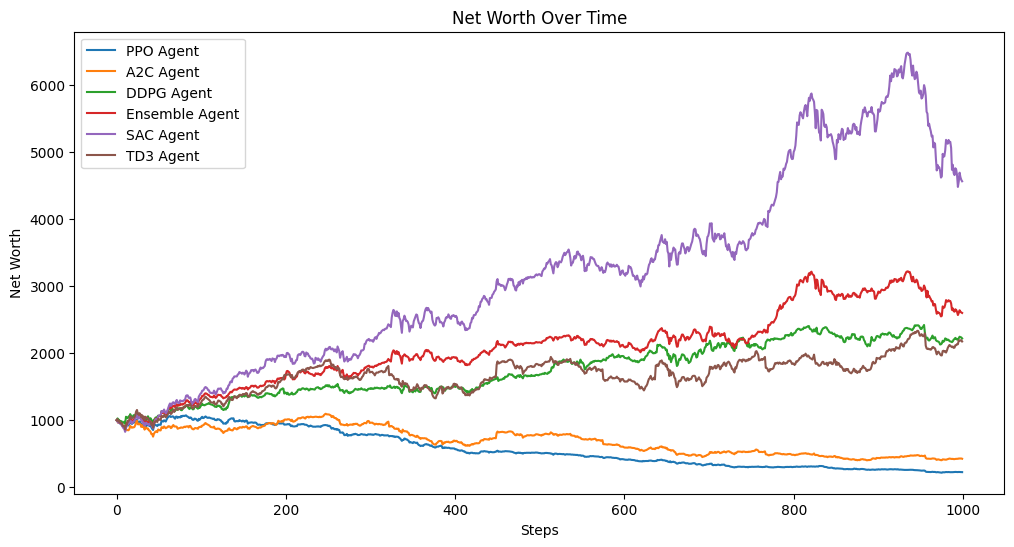

In [20]:
# Extract net worths for visualization
net_worths = [rsult_test_metrics[agent_name]['net_worths'] for agent_name in agents.keys()]

print(net_worths)
steps = next(iter(rsult_test_metrics.values()))['steps']  # Assuming all agents have the same step count for simplicity

# Visualize the performance metrics of multiple agents
visualize_multiple_portfolio_net_worth(steps, net_worths, list(agents.keys()))

In [21]:
# TODO on reruns of this algorithm it gets vastly different results.


print(rsult_test_metrics)

# Assume all 

{'PPO Agent': {'steps': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

In [22]:

# Now compare to just a OLMAR run

# import pandas as pd

# tickers = [
#     'MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW',
#     'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
#     'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WBA', 'WMT', 'XOM'
# ]

# # ticker of benchmark
# benchmark = '^DJI'

# # Get the data from the CSV files
# stock_data = {}
# for ticker in tickers:
#     df = pd.read_csv(f'{ticker}.csv', index_col='Date', parse_dates=True)
#     stock_data[ticker] = df

# # Initialize an empty list to hold the individual DataFrames
# dfs = []
# stock_data_combined = pd.DataFrame()


# # Iterate through the dictionary and add a new column for the key
# for key, df in stock_data.items():
#     df['Ticker'] = key
#     dfs.append(df)

# # Concatenate all DataFrames in the list into a single DataFrame
# stock_data_combined = pd.concat(dfs)

# print(stock_data_combined.head())

In [23]:
import yfinance as yf

# List of tickers
tickers = ['MSFT', 'IBM', 'AAPL', 'GOOG']


# TODO ensure the test range is the same as this range for comparison

# Download data for multiple tickers
data_raw = yf.download(tickers, start="2017-01-01")

print(data_raw.head())


[*********************100%***********************]  4 of 4 completed

Price                      Adj Close                                    \
Ticker                          AAPL       GOOG         IBM       MSFT   
Date                                                                     
2017-01-03 00:00:00+00:00  26.921547  39.210705  112.199295  56.828148   
2017-01-04 00:00:00+00:00  26.891418  39.248611  113.588470  56.573887   
2017-01-05 00:00:00+00:00  27.028172  39.603741  113.212677  56.573887   
2017-01-06 00:00:00+00:00  27.329487  40.208755  113.769669  57.064243   
2017-01-09 00:00:00+00:00  27.579807  40.233692  112.508034  56.882629   

Price                          Close                                    \
Ticker                          AAPL       GOOG         IBM       MSFT   
Date                                                                     
2017-01-03 00:00:00+00:00  29.037500  39.306999  159.837479  62.580002   
2017-01-04 00:00:00+00:00  29.004999  39.345001  161.816437  62.299999   
2017-01-05 00:00:00+00:00  29.152500 

<Axes: xlabel='Date'>

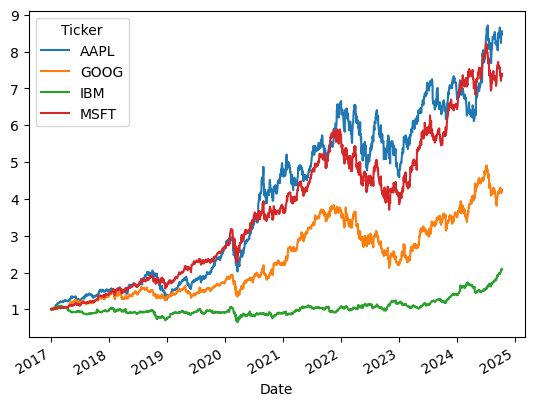

In [24]:
yahoo_data = data_raw['Adj Close']

# plot normalized prices of these stocks
(yahoo_data / yahoo_data.iloc[0,:]).plot()

Summary for window=3:
    Profit factor: 1.07
    Sharpe ratio: 0.53 ± 0.38
    Ulcer index: 1.42
    Information ratio (wrt benchmark): -0.59
    Benchmark sharpe: 1.06 ± 0.45
    Appraisal ratio (wrt benchmark): -0.57 ± 0.36
    Beta / Alpha: 0.99 / -9.290%
    Annualized return: 14.68%
    Annualized volatility: 27.77%
    Longest drawdown: 320 days
    Max drawdown: 29.07%
    Winning days: 53.8%
    Annual turnover: 284.5
        
Summary for window=5:
    Profit factor: 1.12
    Sharpe ratio: 0.73 ± 0.40
    Ulcer index: 1.92
    Information ratio (wrt benchmark): -0.21
    Benchmark sharpe: 1.06 ± 0.45
    Appraisal ratio (wrt benchmark): -0.23 ± 0.36
    Beta / Alpha: 1.01 / -3.842%
    Annualized return: 20.70%
    Annualized volatility: 28.34%
    Longest drawdown: 229 days
    Max drawdown: 34.37%
    Winning days: 54.8%
    Annual turnover: 212.5
        
Summary for window=10:
    Profit factor: 1.08
    Sharpe ratio: 0.58 ± 0.39
    Ulcer index: 1.20
    Information ratio

<Axes: xlabel='Date', ylabel='Total wealth'>

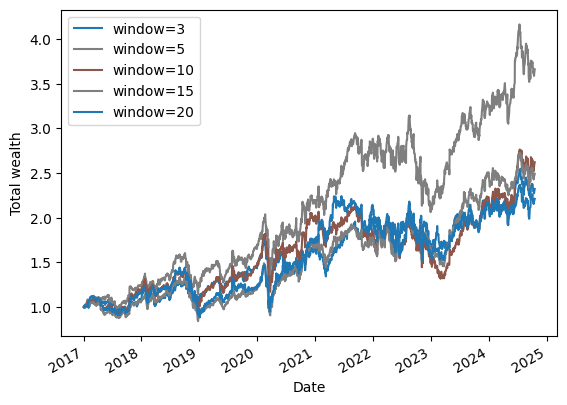

In [25]:
from online_algos import OLMAR, BCRP, BAH

list_result = OLMAR.run_combination(yahoo_data, window=[3,5,10,15, 20], eps=10)
print(list_result.summary())
list_result.plot()

In [26]:


# algo = BCRP()
# result = algo.run(list_result)

# bcrp_B = result.B
# print(result.B)
# bcrp_X = result.X
# print(result.X)
# print(result.summary())
# result.plot();

Summary:
    Profit factor: 1.09
    Sharpe ratio: 0.61 ± 0.39
    Ulcer index: 1.49
    Information ratio (wrt benchmark): -0.61
    Benchmark sharpe: 1.06 ± 0.45
    Appraisal ratio (wrt benchmark): -0.61 ± 0.36
    Beta / Alpha: 1.00 / -8.222%
    Annualized return: 16.09%
    Annualized volatility: 26.50%
    Longest drawdown: 313 days
    Max drawdown: 34.15%
    Winning days: 54.4%
    Annual turnover: 164.1
        
                               AAPL      GOOG   IBM      MSFT
Date                                                         
2017-01-03 00:00:00+00:00  0.250000  0.250000  0.25  0.250000
2017-01-04 00:00:00+00:00  0.250000  0.250000  0.25  0.250000
2017-01-05 00:00:00+00:00  0.000000  0.000000  1.00  0.000000
2017-01-06 00:00:00+00:00  0.000000  1.000000  0.00  0.000000
2017-01-09 00:00:00+00:00  0.000000  0.800000  0.20  0.000000
...                             ...       ...   ...       ...
2024-10-08 00:00:00+00:00  0.015940  0.438136  0.00  0.545924
2024-10-09 00:0

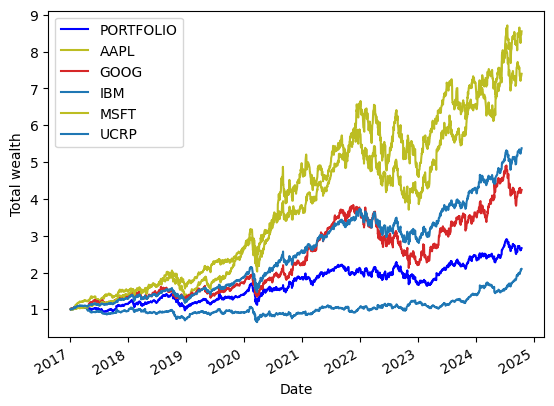

In [27]:
# run buy and hold on OLMAR results and show its equity together with original assets
result = BAH().run(list_result)
print(result.summary())

bah_B = result.B
print(result.B)
bah_X = result.X
print(result.X)

result.plot(assets=True, weights=False, ucrp=True);

In [28]:
# Calculate the annualized return

def calculate_ending_balance(starting_balance, annualized_return, years):
    ending_balance = starting_balance * (1 + annualized_return) ** years
    return ending_balance

# Example values
starting_balance = 1000  # Starting balance of $10,000
annualized_return = 0.2093  # Annualized return of 24.31%
years = 3  # Investment period of 3 years

# Calculate the ending balance
ending_balance = calculate_ending_balance(starting_balance, annualized_return, years)
print(f"Ending balance after {years} years: ${ending_balance:.2f}")


Ending balance after 3 years: $1768.49


Net Worth Over Time:
Date
2017-01-03 00:00:00+00:00    1000.000000
2017-01-04 00:00:00+00:00    1001.918733
2017-01-05 00:00:00+00:00     998.604008
2017-01-06 00:00:00+00:00    1013.859390
2017-01-09 00:00:00+00:00    1012.102604
                                ...     
2024-10-08 00:00:00+00:00    2537.207226
2024-10-09 00:00:00+00:00    2527.936032
2024-10-10 00:00:00+00:00    2525.629627
2024-10-11 00:00:00+00:00    2540.019647
2024-10-14 00:00:00+00:00    2567.723791
Length: 1958, dtype: float64


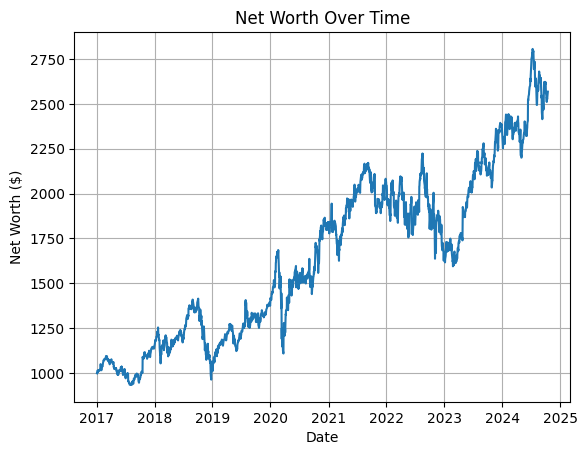

In [29]:
# TODO cna we pull out the weights over every period and then calculate the total wealth?

import pandas as pd
import numpy as np

def calculate_final_investment(X, B, initial_investment):

    # Ensure both dataframes have the same index
    assert X.index.equals(B.index), "The indices of X and B must be the same."
    
    # Calculate log returns
    log_returns = np.log(X)
    
    # Calculate weighted log returns
    weighted_log_returns = (log_returns * B).sum(axis=1)
    
    # Calculate cumulative log returns
    cumulative_log_returns = weighted_log_returns.cumsum()
    
    # Calculate cumulative return factor
    cumulative_return_factor = np.exp(cumulative_log_returns)
    
    # Calculate the final investment amount
    final_investment = initial_investment * cumulative_return_factor
    
    return final_investment

# # Example DataFrame for price relatives (X)
# X = pd.DataFrame({
#     'AAPL': [0.01, 0.02, -0.01],
#     'GOOG': [0.02, 0.01, 0.03],
#     'IBM': [-0.01, 0.03, 0.02],
#     'MSFT': [0.03, 0.00, 0.01]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(X)

# # Example DataFrame for portfolio weights (B)
# B = pd.DataFrame({
#     'AAPL': [0.25, 0.25, 0.00],
#     'GOOG': [0.25, 0.25, 1.00],
#     'IBM':  [0.25, 0.25, 0.00],
#     'MSFT': [0.25, 0.25, 0.00]
# }, index=pd.date_range(start='2020-01-01', periods=3))

# print(B)

# Initial investment amount
initial_investment = 1000

# Calculate final investment amount
# Calculate the net worth over time
net_worth = calculate_final_investment(bah_X, bah_B, initial_investment)

print("Net Worth Over Time:")
print(net_worth)

# Plotting the net worth over time
plt.plot(net_worth.index, net_worth)
plt.xlabel('Date')
plt.ylabel('Net Worth ($)')
plt.title('Net Worth Over Time')
plt.grid(True)
plt.show()


1958


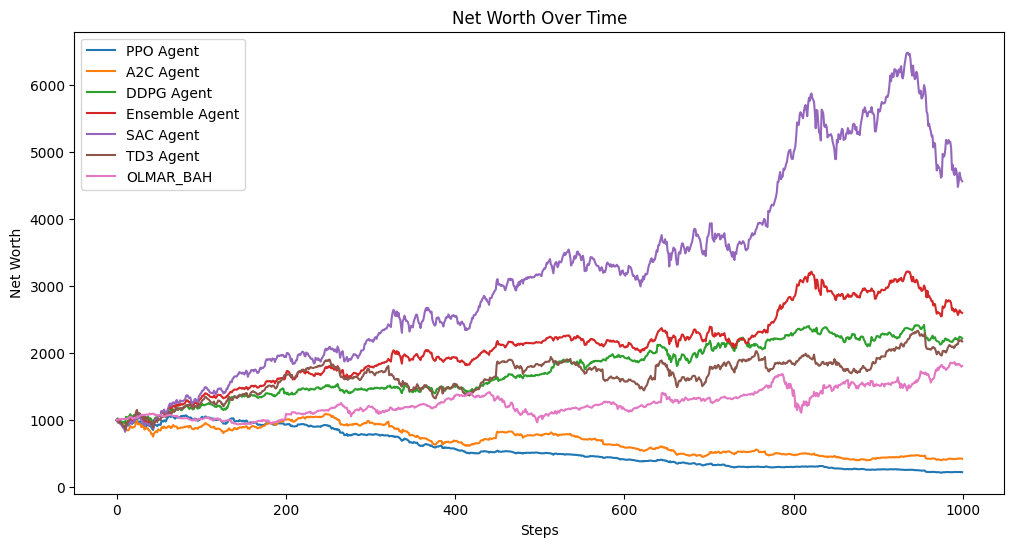

In [30]:
# Combine the data to compare the results

# Extract net worths for visualization
net_worths = [rsult_test_metrics[agent_name]['net_worths'] for agent_name in agents.keys()]

print(len(net_worth))

# align to the length of the other models for the same number of days
# TODO confirm this aligns
align_net_worh_to_others = net_worth[:len(net_worths[0])]

net_worths.append(align_net_worh_to_others)


# Assuming all agents have the same step count for simplicity, same for the online measures
steps = next(iter(rsult_test_metrics.values()))['steps'] 

agent_types = list(agents.keys())
agent_types.append("OLMAR_BAH")

# Visualize the performance metrics of multiple agents
visualize_multiple_portfolio_net_worth(steps, net_worths, agent_types)


# TODO: need to use a transaction fee